# Задание

Используемый набор данных — данные магазина. Он управляет более чем 3000 аптек в 7 европейских странах. Задача — предсказать их ежедневные продажи на срок до шести недель вперед:
1. EDA
2. Анализ временных рядов 
3. Прогнозирование моделирование
4. Результаты
5. Презентация

# Загрузка и описание

In [40]:
import numpy as np
import pandas as pd

store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

/tmp/ipykernel_123177/4163587292.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


Описание данных:

Id — идентификатор, представляющий дуплет (Магазин, Дата) в тестовом наборе

Магазин — уникальный идентификатор для каждого магазина

Продажи — товарооборот за любой заданный день (это то, что вы прогнозируете)

Клиенты — количество клиентов в заданный день

Открыто — индикатор того, был ли магазин открыт: 0 = закрыт, 1 = открыт

StateHoliday — указывает на государственный праздник. Обычно все магазины, за редким исключением, закрыты в государственные праздники. Обратите внимание, что все школы закрыты в государственные праздники и выходные. a = государственный праздник, b = пасхальные каникулы, c = рождество, 0 = нет

SchoolHoliday — указывает, повлияло ли закрытие государственных школ на (Магазин, Дата)

StoreType — различает 4 модели магазинов: a, b, c, d

Assortment — описывает уровень ассортимента: a = базовый, b = дополнительный, c = расширенный

CompetitionDistance — расстояние в метрах до ближайшего магазина-конкурента

CompetitionOpenSince[Month/Year] — указывает примерный год и месяц открытия ближайшего магазина-конкурента

Promo — указывает, проводит ли магазин промо-акцию в этот день

Promo2 — Promo2 — это продолжающаяся и последовательная акция для некоторых магазинов: 0 = магазин не участвует, 1 = магазин участвует

Promo2Since[Year/Week] — описывает год и календарную неделю, когда магазин начал участвовать в Promo2

PromoInterval — описывает последовательные интервалы начала Promo2, называя месяцы акция начинается заново. Например, "Фев,Май,Авг,Нояб" означает, что каждый раунд начинается в феврале, мае, августе, ноябре любого года для этого магазина

# Предобработка

## train и test

In [46]:
print(train.head())
train.info()

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   StateHoliday__0  StateHoliday__a  StateHoliday__b  StateHoliday__c  
0             True            False            False            False  
1             True            False            False            False  
2             True            False            False            False  
3             True            False            False            False  
4             True            False            False            False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data co

In [33]:
print(test.head())
test.info()

   Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4 2015-09-17     1      1            0              0
1   2      3          4 2015-09-17     1      1            0              0
2   3      7          4 2015-09-17     1      1            0              0
3   4      8          4 2015-09-17     1      1            0              0
4   5      9          4 2015-09-17     1      1            0              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  int64         
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 no

In [41]:
print(train['StateHoliday'].unique())
print(test['StateHoliday'].unique())
print(train['Open'].unique())
print(test['Open'].unique())

['0' 'a' 'b' 'c' 0]
['0' 'a']
[1 0]
[ 1. nan  0.]


In [42]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [43]:
test['Open'] = test['Open'].fillna(0).astype(int)
test['Open'] = test['Open'].astype(int)

In [45]:
train['StateHoliday'] = train['StateHoliday'].astype(str)
train = pd.get_dummies(train, columns=['StateHoliday'], prefix='StateHoliday_')

# 1. EDA

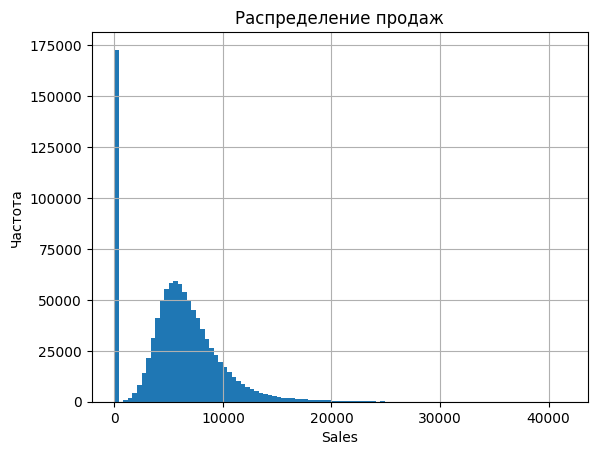

In [8]:
import matplotlib.pyplot as plt

train['Sales'].hist(bins=100)
plt.title("Распределение продаж")
plt.xlabel("Sales")
plt.ylabel("Частота")
plt.show()

# 2. Анализ временных рядов

# 3. Прогнозирование, моделирование

# 4. Результаты